# Analysis Loan Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("Loan Data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [9]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [11]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
df['Dependents'] = df['Dependents'].fillna('0')

In [13]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
df['Self_Employed'] = df['Self_Employed'].fillna('No')

In [15]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

C:\Users\abc\AppData\Local\Temp\ipykernel_14848\3181477347.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

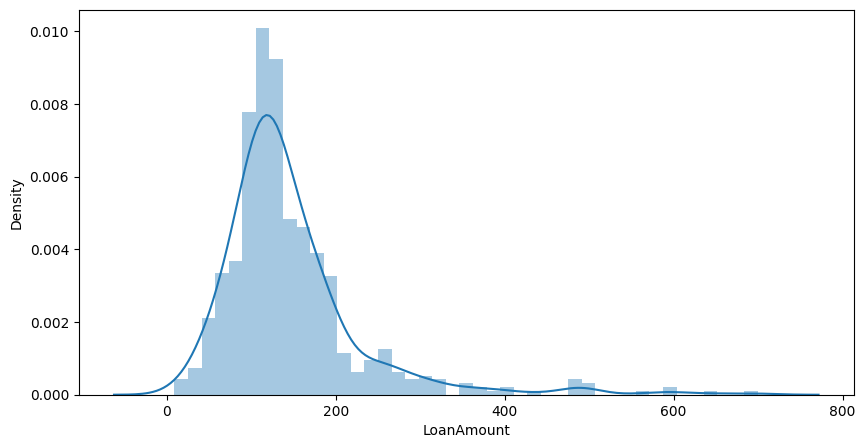

In [16]:
plt.figure(figsize=(10,5))
sns.distplot(df['LoanAmount'])

In [17]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [18]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

C:\Users\abc\AppData\Local\Temp\ipykernel_14848\710718432.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term'])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

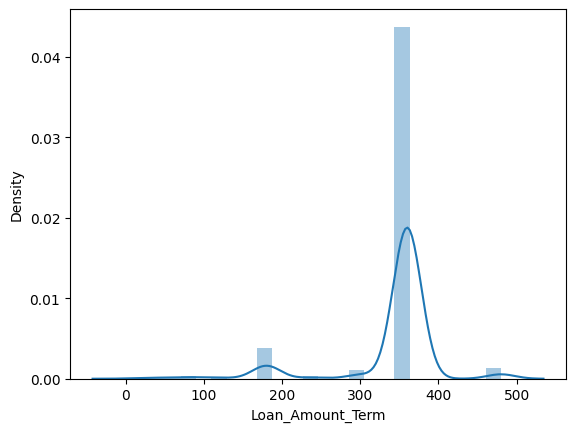

In [19]:
sns.distplot(df['Loan_Amount_Term'])

In [20]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [21]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [22]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [24]:
df['Married'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [25]:
df1= df.copy()


In [26]:
def check_outlies(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower = q1 - (iqr*1.5)
    upper = q3 + (iqr*1.5)
    return lower,upper

In [27]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

C:\Users\abc\AppData\Local\Temp\ipykernel_14848\624905765.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

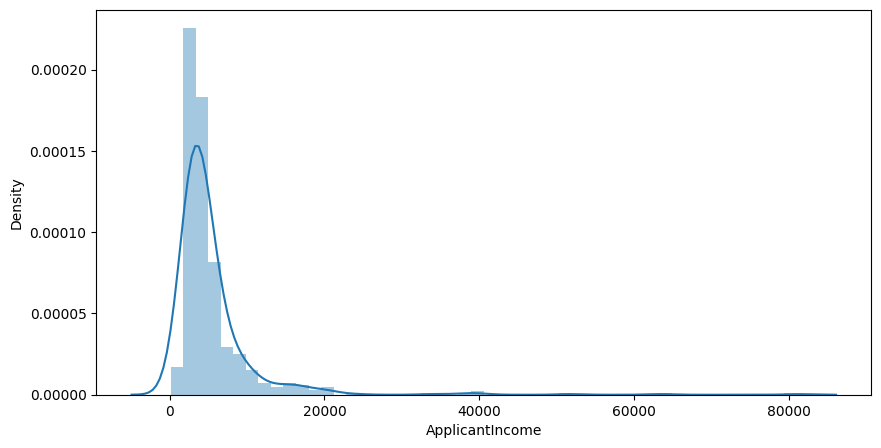

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(df['ApplicantIncome'])

<Axes: ylabel='ApplicantIncome'>

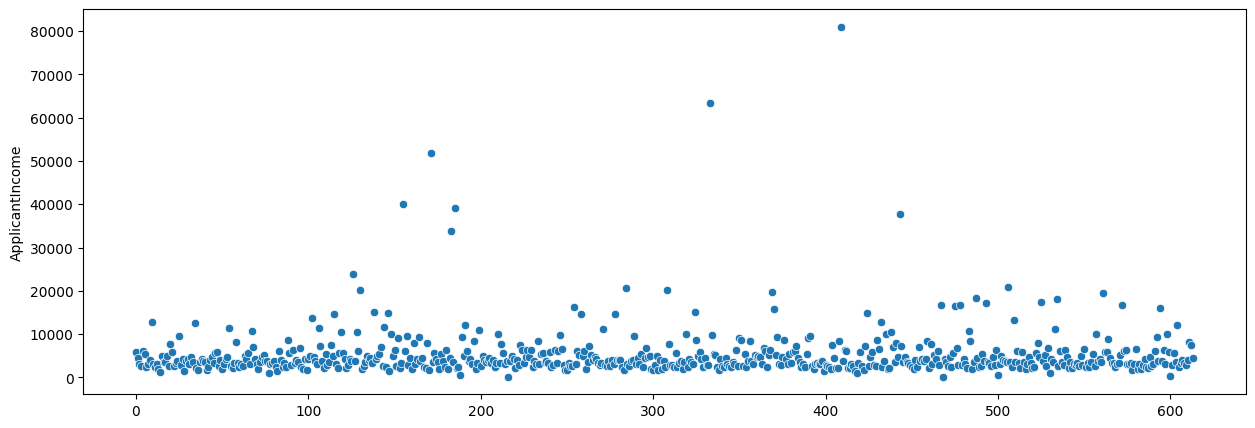

In [29]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['ApplicantIncome'])

In [30]:
lower_applicant,upper_applicant = check_outlies('ApplicantIncome')
print(lower_applicant,upper_applicant)
df1.loc[df['ApplicantIncome'] >= upper_applicant, 'ApplicantIncome'] = upper_applicant
df1.loc[df['ApplicantIncome'] <= lower_applicant, 'ApplicantIncome'] = lower_applicant

-1498.75 10171.25


C:\Users\abc\AppData\Local\Temp\ipykernel_14848\3132858820.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10171.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[df['ApplicantIncome'] >= upper_applicant, 'ApplicantIncome'] = upper_applicant


<Axes: ylabel='ApplicantIncome'>

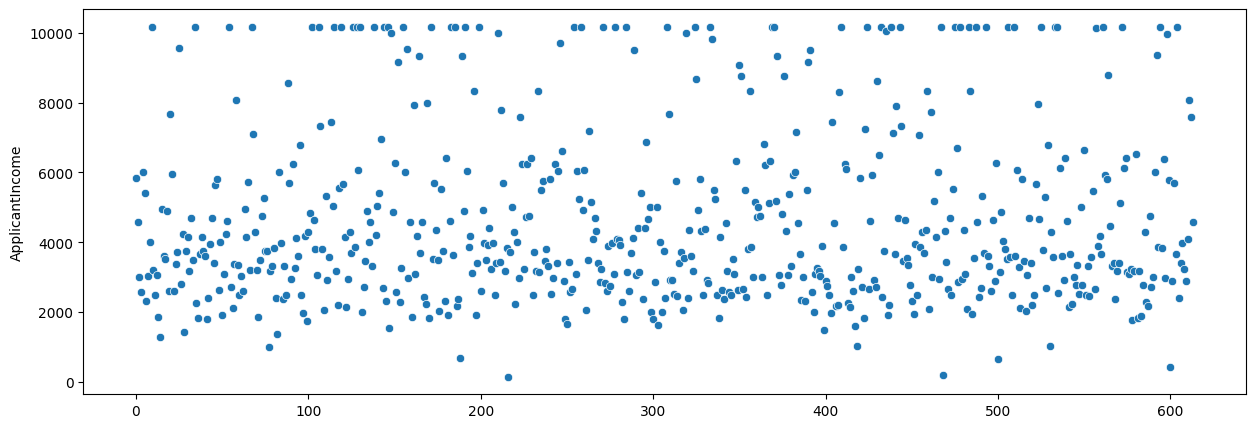

In [31]:
plt.figure(figsize=(15,5))
sns.scatterplot(df1['ApplicantIncome'])

In [32]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

C:\Users\abc\AppData\Local\Temp\ipykernel_14848\2149142820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

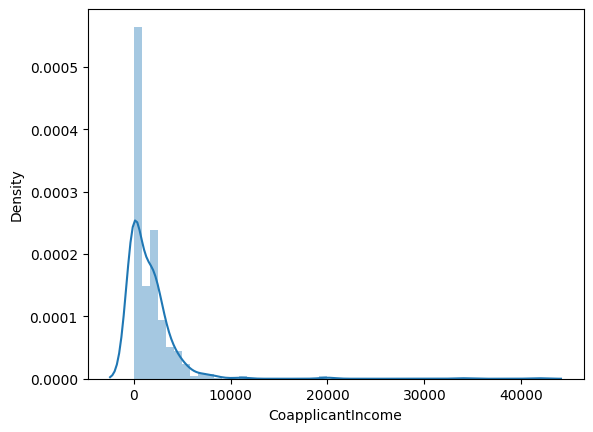

In [33]:
sns.distplot(df['CoapplicantIncome'])

<Axes: ylabel='CoapplicantIncome'>

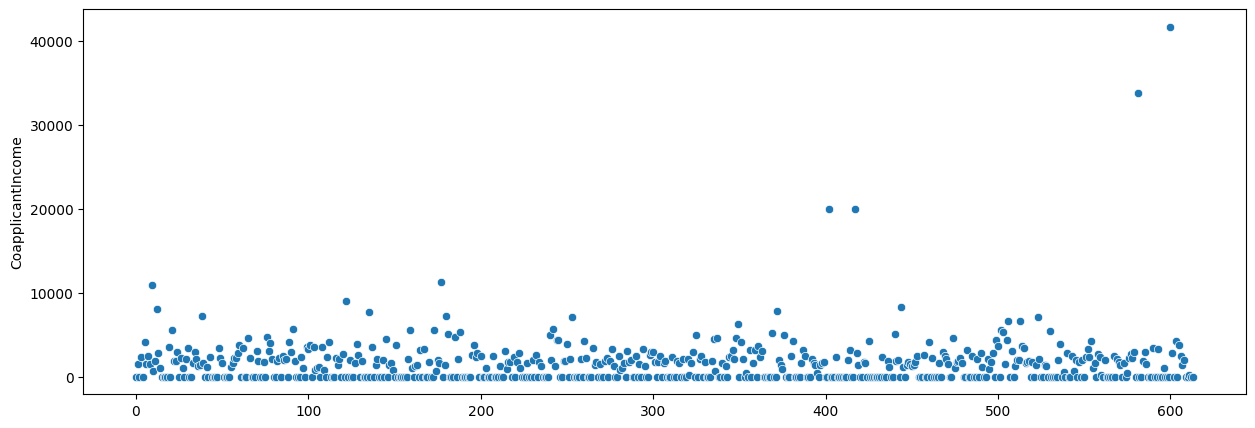

In [34]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['CoapplicantIncome'])

In [35]:
lower_Coapplicant,upper_Coapplicant = check_outlies('CoapplicantIncome')
print(lower_Coapplicant,upper_Coapplicant)
df1.loc[df['CoapplicantIncome'] >= upper_Coapplicant, 'CoapplicantIncome'] = upper_Coapplicant
df1.loc[df['CoapplicantIncome'] <= lower_Coapplicant, 'CoapplicantIncome'] = lower_Coapplicant

-3445.875 5743.125


<Axes: ylabel='CoapplicantIncome'>

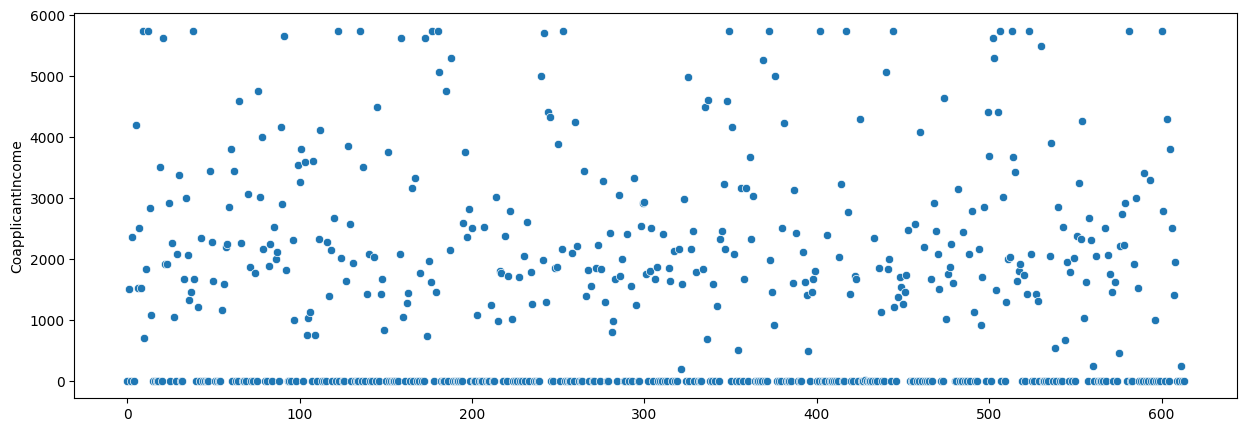

In [36]:
plt.figure(figsize=(15,5))
sns.scatterplot(df1['CoapplicantIncome'])

In [37]:
df['LoanAmount'].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

C:\Users\abc\AppData\Local\Temp\ipykernel_14848\413488336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

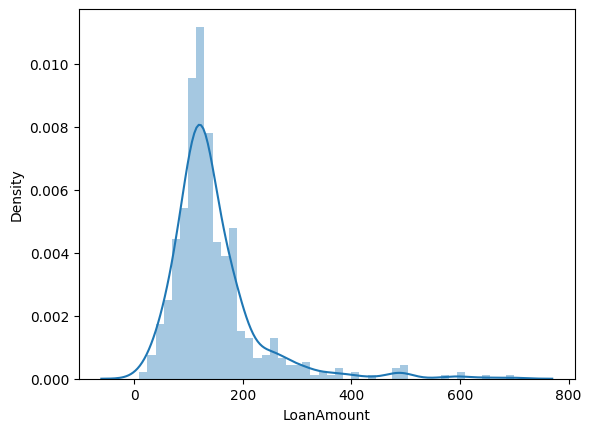

In [38]:
sns.distplot(df['LoanAmount'])

<Axes: ylabel='LoanAmount'>

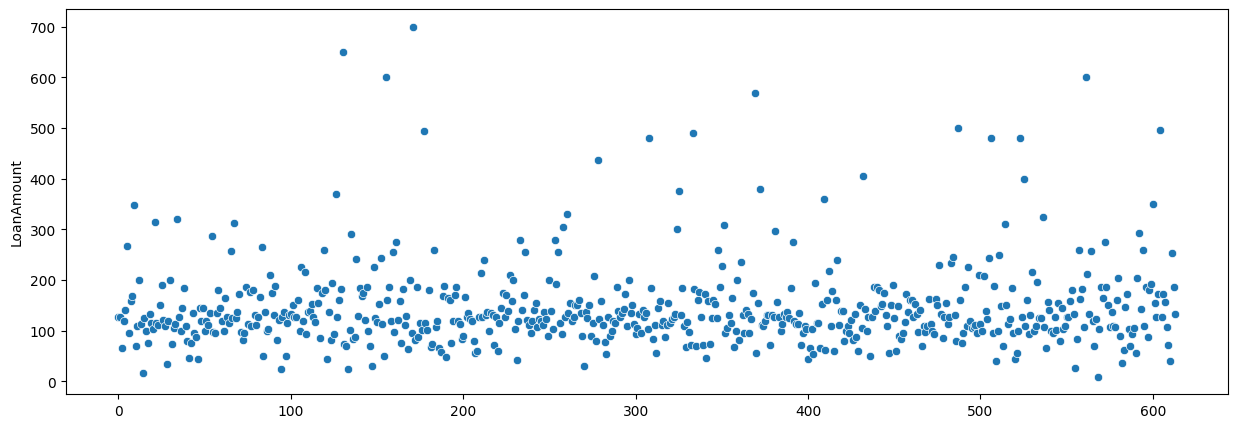

In [39]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['LoanAmount'])

In [40]:
df2 = df.copy()

In [41]:
lower_applicant,upper_applicant = check_outlies('ApplicantIncome')
print(lower_applicant,upper_applicant)
df2 = df[(df['CoapplicantIncome'] <= upper_applicant) & (df['CoapplicantIncome'] >= lower_applicant)]

-1498.75 10171.25


In [42]:
lower_Coapplicant,upper_Coapplicant = check_outlies('CoapplicantIncome')
print(lower_Coapplicant,upper_Coapplicant)
df2 = df[(df['CoapplicantIncome'] <= upper_Coapplicant) & (df['CoapplicantIncome'] >= lower_Coapplicant)]

-3445.875 5743.125


In [43]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [44]:
df1['genders'] = df1['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [45]:
df1['marrieds'] = df1['Married'].apply(lambda x:1 if x=='Yes' else 0)

In [46]:
df1['educations'] = df1['Education'].apply(lambda x:1 if x=='Graduate' else 0)

In [47]:
df1['self_employeds'] = df1['Self_Employed'].apply(lambda x:1 if x=='Yes' else 0)

In [48]:
df1['Urban'] = df1['Property_Area'].apply(lambda x:1 if x=='Urban' else 0)
df1['SemiUrban'] = df1['Property_Area'].apply(lambda x:1 if x=='Semiurban' else 0)
df1['Rural'] = df1['Property_Area'].apply(lambda x:1 if x=='Rural' else 0)

In [49]:
df1['Dependents'] = df1['Dependents'].str.split('').str.get(1).astype('int64')

In [50]:
df1['loan_statuses'] = df1['Loan_Status'].apply(lambda x:1 if x=='Y' else 0)

In [51]:
df1.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,genders,marrieds,educations,self_employeds,Urban,SemiUrban,Rural,loan_statuses
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,...,Urban,Y,1,0,1,0,1,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,...,Rural,N,1,1,1,0,0,0,1,0


In [52]:
df1 = df1.drop(columns=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'])

In [53]:
df1.head(3)

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,genders,marrieds,educations,self_employeds,Urban,SemiUrban,Rural,loan_statuses
0,LP001002,0,5849.0,0.0,128.0,360.0,1.0,1,0,1,0,1,0,0,1
1,LP001003,1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,1,0
2,LP001005,0,3000.0,0.0,66.0,360.0,1.0,1,1,1,1,1,0,0,1


In [54]:
X = df1.iloc[:,1:14]
Y = df1.iloc[:,14]

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [57]:
from sklearn.linear_model import LogisticRegression
clasified = LogisticRegression()
clasified.fit(x_train,y_train)

LogisticRegression()

In [58]:
y_pred = clasified.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[18, 25],
       [ 1, 79]], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7886178861788617